In [129]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
url = "https://xl-soccer-world.ezleagues.ezfacility.com/leagues/293178/Spring-2017---Men%27s-A-League.aspx#standings"
r = requests.get(url)

In [131]:
soup = BeautifulSoup(r.content, "html5lib")

In [132]:
table = soup.find("table", {"id": "ctl00_C_Schedule1_GridView1"})
table_rows = table.find_all("tr", {"class": ["RowStyle", "AlternateRowStyle"]})

In [133]:
games = []
for tr in table_rows:
    td = tr.find_all("td")
    row = [i.text.strip() for i in td][:4]
    if 'Inter' in row:
        games.append(row)

In [134]:
print(*games, sep='\n')

['Tue-Mar 14', 'ABCDE FC', '4 - 7', 'Inter']
['Tue-Mar 21', 'El Camino Bandidos', '8 - 7', 'Inter']
['Tue-Mar 28', 'Inter', '4 - 5', 'Two Buck Chuck']
['Tue-Apr 4', 'Inter', '4 - 5', 'ABCDE FC']
['Tue-Apr 11', 'Inter', 'v', 'El Camino Bandidos']
['Tue-Apr 18', 'Two Buck Chuck', 'v', 'Inter']
['Tue-Apr 25', 'Inter', 'v', 'ABCDE FC']


In [135]:
goles_scored = []
win_lose = []
for game in games:
    if game[2] != 'v' and game[3] == 'Inter':
        goles_scored.append(int(game[2][-1]))
        if int(game[2][-1]) > int(game[2][0]):
            win_lose.append('win')
        elif int(game[2][-1]) < int(game[2][0]):
            win_lose.append('loss')
        else:
            win_lose.append('tie')
    elif game[2] != 'v' and game[1] == 'Inter':
        goles_scored.append(int(game[2][0]))
        if int(game[2][-1]) > int(game[2][0]):
            win_lose.append('loss')
        elif int(game[2][-1]) < int(game[2][0]):
            win_lose.append('win')
        else:
            win_lose.append('tie')
    
all_goals = sum(goles_scored)

In [136]:
print(goles_scored)
print(win_lose)
print(sum(goles_scored))

[7, 7, 4, 4]
['win', 'loss', 'loss', 'loss']
22


In [137]:
games_played = []
for idx, value in enumerate(goles_scored):
    games_played.append(idx + 1)
print(games_played[-1])

4


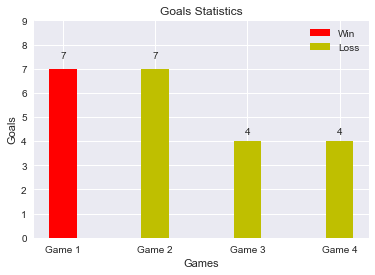

In [138]:
labels = []
col = []
for i in range(len(games)):
    labels.append('Game ' + str(i + 1))

for result in win_lose:
    if result == "win":
        col.append('r')
    elif result == "loss":
        col.append('y')
    else:
        col.append('b')
        
bars = plt.bar(games_played, goles_scored, width, color=col)
plt.title('Goals Statistics')
plt.xlabel('Games')
plt.ylabel('Goals')
plt.yticks(range(0, max(goles_scored) + 3))
plt.xticks(games_played, labels)

plt.legend(bars, ('Win', 'Loss'))

def autolabel(bars):
    for rect in bars:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(bars)

plt.show()